In [41]:
from dash import dcc
import pickle
import plotly.express as px

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [42]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [43]:
data_dict = unpickle("data_pick/train")

In [4]:
def pick_x(x):
    filenames = data_dict[b'filenames'][:x]
    fine_labels = data_dict[b'fine_labels'][:x]
    coarse_labels = data_dict[b'coarse_labels'][:x]
    data = data_dict[b'data'][:x]
    print(filenames)
    print(fine_labels)
    print(coarse_labels)
    print(data)
    return data, filenames, fine_labels, coarse_labels
    
data, filenames, fine_labels, coarse_labels = pick_x(600)

[b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png', b'phone_s_002161.png', b'car_train_s_000043.png', b'beaker_s_000604.png', b'fog_s_000397.png', b'rogue_elephant_s_000421.png', b'computer_keyboard_s_000757.png', b'willow_tree_s_000645.png', b'sunflower_s_000549.png', b'palace_s_000759.png', b'adriatic_s_001782.png', b'computer_keyboard_s_001277.png', b'bike_s_000682.png', b'wolf_pup_s_001323.png', b'squirrel_s_002467.png', b'sea_s_000678.png', b'shrew_s_002233.png', b'pine_tree_s_000087.png', b'rose_s_000373.png', b'surveillance_system_s_000769.png', b'pine_s_001533.png', b'table_s_000897.png', b'opossum_s_001237.png', b'quercus_alba_s_000257.png', b'leopard_s_000414.png', b'possum_s_002195.png', b'bike_s_000127.png', b'balmoral_castle_s_000361.png', b'acer_saccharinum_s_000646.png', b'lapin_s_000916.png', b'chimp_s_001419.png', b'clock_s_002291.png', b'streetcar_s_000663.png', b'male_child_s_000800.p

In [5]:
# Specify the number of components to keep (you can adjust this as needed)
num_components = 2

# Create a PCA object
pca = PCA(n_components=num_components)

# Fit and transform the data
data_pca = pca.fit_transform(data)

In [6]:
unique_coarse_labels = list(set(coarse_labels))
coarse_colormap = plt.cm.get_cmap('viridis', len(unique_coarse_labels))  # You can choose any colormap

unique_fine_labels = list(set(fine_labels))
fine_colormap = plt.cm.get_cmap('inferno', len(unique_fine_labels))  # You can choose any colormap

/var/folders/j2/3_89d0w54p3gxvxn4xxzh_qw0000gn/T/ipykernel_96829/138456651.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coarse_colormap = plt.cm.get_cmap('viridis', len(unique_coarse_labels))  # You can choose any colormap
/var/folders/j2/3_89d0w54p3gxvxn4xxzh_qw0000gn/T/ipykernel_96829/138456651.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  fine_colormap = plt.cm.get_cmap('inferno', len(unique_fine_labels))  # You can choose any colormap


In [7]:
# Create a normalization function to map labels to colors
normalize = plt.Normalize(0, len(unique_coarse_labels))
coarse_colors = [coarse_colormap(normalize(unique_coarse_labels.index(label))) for label in coarse_labels]

normalize = plt.Normalize(0, len(unique_fine_labels))
fine_colors = [fine_colormap(normalize(unique_fine_labels.index(label))) for label in fine_labels]

/var/folders/j2/3_89d0w54p3gxvxn4xxzh_qw0000gn/T/ipykernel_96829/31154328.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, a], data_pca[:, b], c=fine_colors, cmap=fine_colormap)


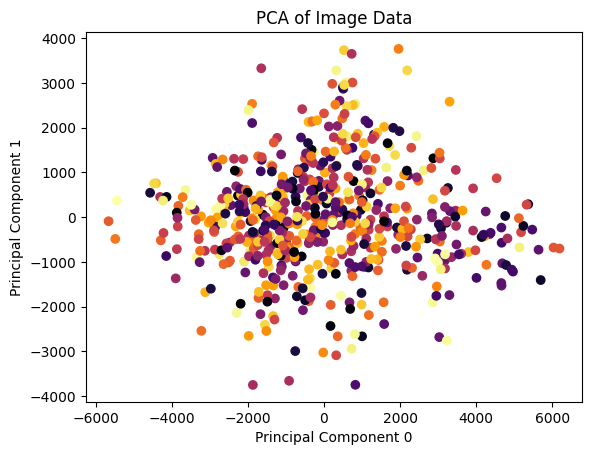

In [8]:
a = 0
b = 1
# Create a scatter plot of the PCA results
#plt.scatter(data_pca[:, a], data_pca[:, b], c=coarse_colors, cmap=coarse_colormap)
plt.scatter(data_pca[:, a], data_pca[:, b], c=fine_colors, cmap=fine_colormap)

plt.title('PCA of Image Data')
plt.xlabel('Principal Component ' + str(a))
plt.ylabel('Principal Component ' + str(b))
plt.show()

In [17]:
# TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(data)
tsne.kl_divergence_

1.248157262802124

In [20]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color = coarse_labels)
fig.update_layout(
    title="t-SNE visualization of Images",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [27]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)  # Choose the number of components
image_data_pca = pca.fit_transform(data)

In [28]:
from sklearn.cluster import KMeans
# Perform K-Means clustering
n_clusters = 10  # You can choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(image_data_pca)  # Use PCA-reduced data if applied

/Users/santiagolopez/miniforge3/envs/Data_vis/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



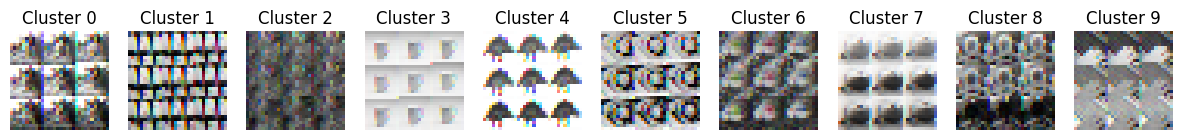

In [31]:
import matplotlib.pyplot as plt
# Create subplots for each cluster
fig, axs = plt.subplots(1, n_clusters, figsize=(15, 3))

for cluster_id in range(n_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    cluster_images = [data[i].reshape(32, 32, 3) for i in cluster_indices]

    axs[cluster_id].imshow(cluster_images[0])
    axs[cluster_id].set_title(f'Cluster {cluster_id}')
    axs[cluster_id].axis('off')

plt.show()


# Color Histogram

In [37]:
# Reshape the image data to have separate channels and individual images
image_data = data.reshape(-1, 32, 32, 3)

In [38]:
import cv2
color_histograms = []

for i in range(image_data.shape[0]):
    image = image_data[i]
    
    # Separate the channels
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    # Calculate histograms for each channel
    red_hist = cv2.calcHist([red_channel], [0], None, [256], [0, 256]).flatten()
    green_hist = cv2.calcHist([green_channel], [0], None, [256], [0, 256]).flatten()
    blue_hist = cv2.calcHist([blue_channel], [0], None, [256], [0, 256]).flatten()
    
    # Concatenate the histograms into a single feature vector
    combined_hist = np.hstack((red_hist, green_hist, blue_hist))
    color_histograms.append(combined_hist)

# Convert the list of histograms to a NumPy array
color_histograms = np.array(color_histograms)


In [40]:
# Perform K-Means clustering
n_clusters = 4 # You can choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(image_data)


ValueError: Found array with dim 4. KMeans expected <= 2.